<a href="https://colab.research.google.com/github/markasif/ANN_Deep_Learning-Examples-/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
classes = ["Airplane", "Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]


In [ ]:
def display_img(index):
  plt.figure(figsize=(3,2))#set the size of images
  plt.matshow(X_train[index])#display the image using matshow
  plt.axis('off')#turn off the axis labels
  plt.title(classes[int(y_train[index])])

<ipython-input-4-e36afe7377f2>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[index])])


<Figure size 300x200 with 0 Axes>

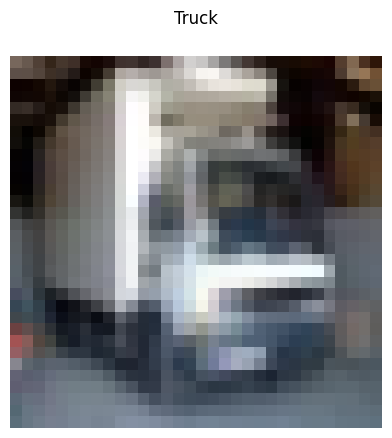

In [ ]:
display_img(2001)

In [ ]:
model= Sequential()
model.add(Conv2D(10,(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,(3,3),activation="relu",padding='same'))
model.add(Conv2D(30,(3,3),activation="relu",padding='same'))
model.add(Conv2D(40,(3,3),activation="relu",padding='same'))
model.add(Conv2D(50,(3,3),activation="relu",padding='same'))
model.add(Conv2D(60,(3,3),activation="relu",padding='same'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
trainig_data = model.fit(X_train,y_train,batch_size=1000,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.0867 - loss: 4.2549 - val_accuracy: 0.1737 - val_loss: 2.5859
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2130 - loss: 2.3454 - val_accuracy: 0.3017 - val_loss: 1.8431
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3259 - loss: 1.8079 - val_accuracy: 0.3830 - val_loss: 1.6654
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3970 - loss: 1.6226 - val_accuracy: 0.4301 - val_loss: 1.5365
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4543 - loss: 1.4806 - val_accuracy: 0.4552 - val_loss: 1.4707
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4870 - loss: 1.4056 - val_accuracy: 0.4829 - val_loss: 1.4094
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5095 - loss: 1.3442 - val_accuracy: 0.5087 - val_loss: 1.3441
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5401 - loss: 1.2583 - val_accuracy: 0.5300 -

In [ ]:
hist = trainig_data.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'loss')

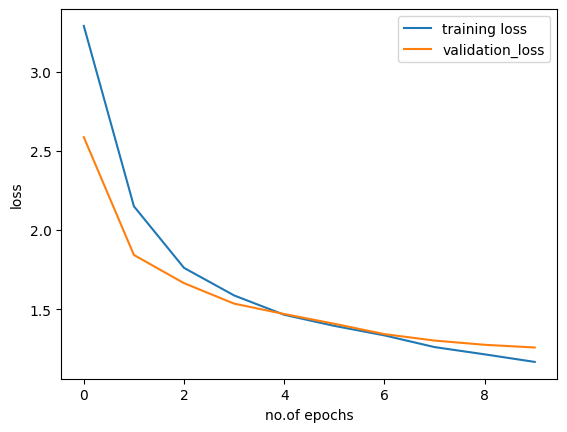

In [ ]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label="validation_loss")
plt.legend()
plt.xlabel("no.of epochs")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

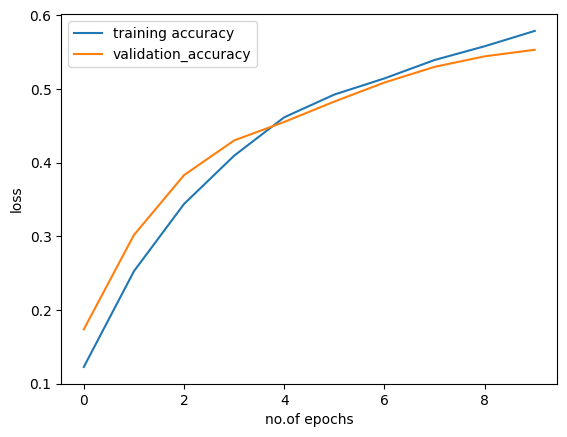

In [ ]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label="validation_accuracy")
plt.legend()
plt.xlabel("no.of epochs")
plt.ylabel("loss")

In [ ]:
def predict(index):
  plt.imshow(X_test[index])
  predict_img=X_test[index].reshape(1,32,32,3)
  predict_prob=model.predict(predict_img)
  predict_class = np.argmax(predict_prob)
  print('true label',classes[int(y_test[index])])
  print('predict label',classes[predict_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
true label Dog
predict label Dog


<ipython-input-14-2ac5f9510d85>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('true label',classes[int(y_test[index])])


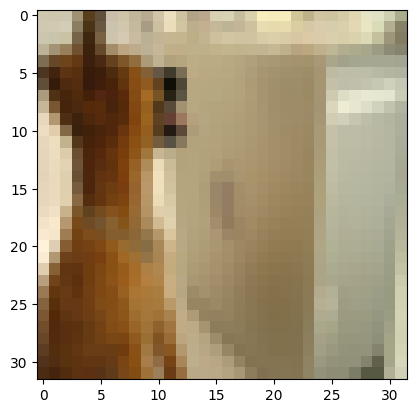

In [ ]:
predict(2001)

In [ ]:
## example 2